# 逻辑回归基础概念
## 1. 一元逻辑回归
在分类的情况下，我们的数据集不一定是连续的。例如：
- 1、考试成绩大于等于60分为及格，记为1
- 2、考试成绩小于60分为不及格，记为0

导入一组分数数据，看看数据的分布情况 ⬇️

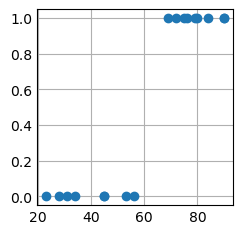

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# get data
data = pd.read_csv('./examdata.csv')
x = data.loc[:, 'Exam']
y = data.loc[:, 'Pass']
# plot
plt.figure()
plt.scatter(x, y)
plt.show()

可以看出，数据的分布情况是离散的。跟我们前面所说的【房价回归预测-Income_Price】的散点图比较一下 ⬇️

<img src="../../../../images/回归/房价回归预测.png" width="200" />

以上两种情况的目标都是一致的——**找到拟合的曲线对数据进行拟合**。很自然的，对于离散的数据来说，可以用 "分段函数" 进行拟合 ⬇️

例 ： $y :\begin{cases} 1, x>=60\\ 2, x<60 \end{cases}$

----


然而，分段函数并不适合进行计算机中数学计算，最好是能够把这个拟合曲线抽象为一个函数。
正好 **Sigmoid** 函数：

 $ y=\frac{1}{1+ e^{-x}} $

可以满足我们的需求，把 **Sigmoid函数** 的曲线画出来如下 ⬇️

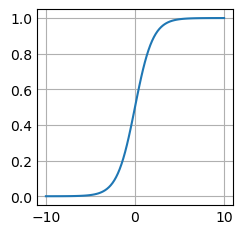

In [ ]:
# make data
x_s = np.linspace(-10, 10, 100) # 1-10之间，生成100个数
y_s = 1 / (1 + pow(np.e, -(x_s)))
# plot
plt.figure()
plt.plot(x_s, y_s)
plt.show()

接着，我们用 **Sigmoid函数** 对上面的考试数据进行拟合如下 ⬇️

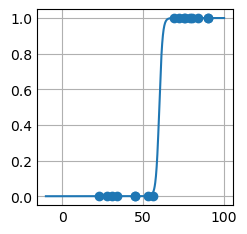

In [ ]:
# make data
x_sigmoid = np.linspace(-10, 100, 1000) # 1-10之间，生成100个数
y_sigmoid = 1 / (1 + pow(np.e, -(x_sigmoid-60))) #曲线往右平移60

# plot
plt.figure()
plt.scatter(x, y) # 考试成绩
plt.plot(x_sigmoid, y_sigmoid)
plt.show()

In [ ]:
大多数情况下，逻辑回归应用的场景如下：

多元Sigmoid函数

 $ h(x_1, x_2) =\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0 $
 
 $ y=\frac{1}{1+ e^{-h(x_1, x_2)}} $

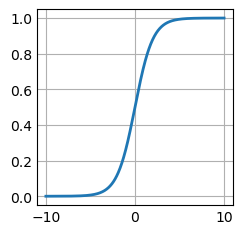

[[3.05902227e-07 4.14177956e-07 5.60778436e-07 ... 9.99999439e-01
  9.99999586e-01 9.99999694e-01]
 [3.05902227e-07 4.14177956e-07 5.60778436e-07 ... 9.99999439e-01
  9.99999586e-01 9.99999694e-01]
 [3.05902227e-07 4.14177956e-07 5.60778436e-07 ... 9.99999439e-01
  9.99999586e-01 9.99999694e-01]
 ...
 [3.05902227e-07 4.14177956e-07 5.60778436e-07 ... 9.99999439e-01
  9.99999586e-01 9.99999694e-01]
 [3.05902227e-07 4.14177956e-07 5.60778436e-07 ... 9.99999439e-01
  9.99999586e-01 9.99999694e-01]
 [3.05902227e-07 4.14177956e-07 5.60778436e-07 ... 9.99999439e-01
  9.99999586e-01 9.99999694e-01]]


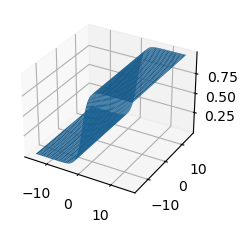

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd


X1_new = np.linspace(-15, 15, 100)
X2_new = np.linspace(-15, 15, 100)
X1_new, X2_new = np.meshgrid(X1_new, X2_new)

Y = 1 / (1 + pow(np.e, -X1_new))

print(Y)
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# ax.plot_trisurf(X1_new, X2_new, Y)
ax.plot_surface(X1_new, X2_new, Y)

plt.show()

[[0.99999996 0.99999994 0.99999992 ... 0.99999992 0.99999994 0.99999996]
 [0.99999994 0.99999991 0.99999988 ... 0.99999988 0.99999991 0.99999994]
 [0.99999992 0.99999988 0.99999983 ... 0.99999983 0.99999988 0.99999992]
 ...
 [0.99999992 0.99999988 0.99999983 ... 0.99999983 0.99999988 0.99999992]
 [0.99999994 0.99999991 0.99999988 ... 0.99999988 0.99999991 0.99999994]
 [0.99999996 0.99999994 0.99999992 ... 0.99999992 0.99999994 0.99999996]]


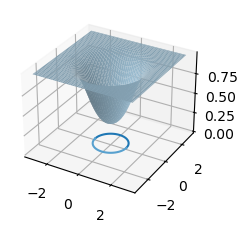

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

# Make data
X1 = np.linspace(-1, 1, 100)
X2_1 = np.sqrt(abs(1 - pow(X1, 2)))
X2_2 = -np.sqrt(abs(1 - pow(X1, 2)))

X1_new = np.linspace(-3, 3, 100)
X2_new = np.linspace(-3, 3, 100)
X1_new, X2_new = np.meshgrid(X1_new, X2_new)

Y = 1 / (1 + pow(np.e, -(X1_new ** 2 + X2_new ** 2 - 1)))

print(Y)
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.plot(X1, X2_1)
plt.plot(X1, X2_2)

# ax.plot_trisurf(X1_new, X2_new, Y)
ax.plot_surface(X1_new, X2_new, Y)

plt.show()

### 小结

逻辑回归：用于解决分类问题的一种模型。根据数据特征或属性，计算其归属于某一类别的概率P(x)。根据概率数值判断其所属类别。主要应用场景：二分类问题。